In [3]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from chainconsumer import ChainConsumer
#import corner

UsageError: Line magic function `%import` not found.


In [54]:
def log_prob(x, d, CN):
    s=x[0]
    CS=x[1]
    if CS <= 0.01 or CS >= 100.:
        return -100.
    else:
        return -0.5*np.log(CS) - 0.5*s**2/CS - 0.5*(s-d)**2/CN


In [95]:
nwalkers = 32
ndim=2
CN=1.
d=1.
p0 = np.zeros((nwalkers,ndim))#[d,CN]
np.random.seed(42)
p0[:,0]=d + np.random.rand(nwalkers)
p0[:,1]=CN + .2*np.random.rand(nwalkers)
print(np.shape(p0))
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[d,CN])


(32, 2)


In [96]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [97]:
sampler.run_mcmc(state,100000);

None


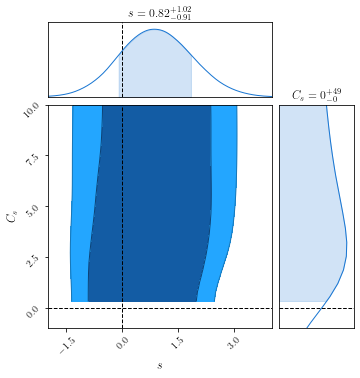

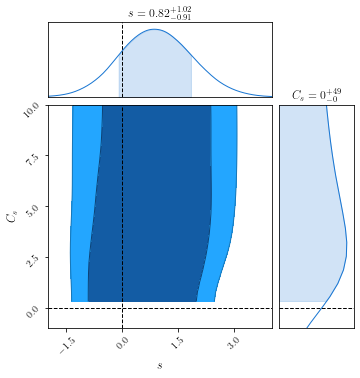

In [100]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
c = ChainConsumer()
c.add_chain(flat_samples, parameters=["$s$", "$C_s$"],walkers=32)
print(c.analysis.get_max_posteriors(parameters=["$s$", "$C_s$"]))
#c.add_marker(location=[1,4],marker_style='X',marker_size=40)
c.plotter.plot(filename="l1.png", extents=[(-2,4),(-1,10)],figsize="column",truth=[0,0],legend=None)


In [92]:
estp=.5*(d**2-2. + d*np.sqrt(d**2-4.))
print(estp)
estm=.5*(d**2-2. - d*np.sqrt(d**2-4.))
print(estm)

print(log_prob((np.sqrt(estp),estp), d, CN))
print(log_prob((np.sqrt(estm),estm), d, CN))
print(log_prob((2.38,6.1), d, CN))
print(d**2-CN)

4.0
0.25
-1.3181471805599454
-1.8068528194400546
-1.375639467556846
5.25


In [133]:
np.random.seed(seed=42)
n=np.random.normal(size=2)
s=np.random.normal(size=2)
d=s+n
print(d)

[1.14440269 1.38476556]


In [181]:
CN=1.
def log_2dprob(x, d):
    s=x[:2]
    CS=x[2]
    if CS <= .0001 or CS >= 10.:
        return -100
    else:
        return -0.5*np.log(CS**2) - 0.5*np.dot(s,s)/CS - 0.5*np.dot((s-d),s-d)/CN


In [182]:
nwalkers = 32
ndim=3
p0 = np.zeros((nwalkers,ndim))#[d,CN]
np.random.seed(42)
p0[:,0]=np.random.rand(nwalkers)
p0[:,1]=np.random.rand(nwalkers)
p0[:,2]=(1.+.01*np.random.rand(nwalkers))
print(p0[:,2])
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_2dprob, args=[d])
state = sampler.run_mcmc(p0, 100)
sampler.reset()

[1.00280935 1.00542696 1.00140924 1.00802197 1.00074551 1.00986887
 1.00772245 1.00198716 1.00005522 1.00815461 1.00706857 1.00729007
 1.0077127  1.00074045 1.00358466 1.00115869 1.00863103 1.00623298
 1.00330898 1.00063558 1.00310982 1.00325183 1.00729606 1.00637557
 1.00887213 1.00472215 1.00119594 1.00713245 1.00760785 1.00561277
 1.00770967 1.00493796]


In [183]:
sampler.run_mcmc(state,200000)

State([[ 3.35853062e+00  2.48791596e+00  5.86741943e+00]
 [ 2.39582628e+00  1.28981547e+00  2.63513523e+00]
 [ 7.44097104e-01  1.25542905e+00  2.29433541e+00]
 [-1.22712798e+00  2.25121847e-01  9.09531895e+00]
 [ 5.60283694e-01  1.41319535e+00  6.28078096e+00]
 [-1.39553351e+00  7.11698922e-01  1.57488414e+00]
 [ 2.97036050e-01  1.38774705e-01  1.26395094e-01]
 [ 2.48696118e+00 -3.24166978e-01  5.11380040e+00]
 [-5.29975450e-01 -3.58720423e-01  5.29420553e+00]
 [-4.08380155e-02  4.11251361e-01  1.31068590e+00]
 [ 4.40944949e-01 -2.24412254e-01  6.25021234e-01]
 [ 3.96230802e-01  4.87225208e-01  3.33796528e+00]
 [ 1.19404224e+00  1.47897187e+00  7.54433587e+00]
 [ 4.97111793e-01  2.22713067e+00  2.48105284e+00]
 [ 1.28098319e+00  6.28312478e-01  5.85261286e+00]
 [ 9.54488952e-01  6.69067239e-01  9.93746150e+00]
 [ 2.05202186e-01  8.96009293e-01  7.95814953e+00]
 [ 9.85860306e-01  6.94313059e-01  4.17407700e+00]
 [ 6.19024716e-01 -1.80983187e-02  9.13892467e-01]
 [ 7.05525552e-01  9.6919

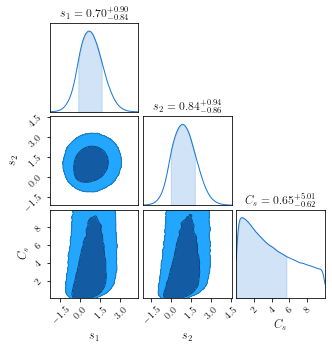

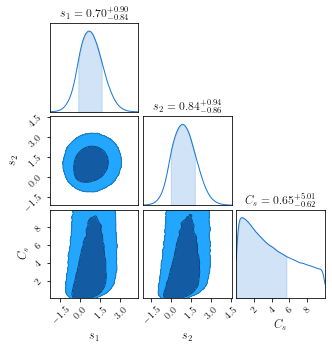

In [187]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
c = ChainConsumer()
c.add_chain(flat_samples, parameters=["$s_1$", "$s_2$","$C_s$"])
maxp=[d[0]/2.,d[1]/2.,1.]
c.plotter.plot(filename="3d.png")#,truth=maxp)#,figsize="column",truth=[0,0],legend=None)


In [189]:
print(d)
bard=0.5*np.dot(d,d)
print(bard)
estp=.5*(bard**2-2. + bard*np.sqrt(bard**2-4.))
print(estp)
estm=.5*(bard**2-2. - bard*np.sqrt(bard**2-4.))
print(estm)

#print(log_prob((np.sqrt(estp),estp), d, CN))
#print(log_prob((np.sqrt(estm),estm), d, CN))
#print(log_prob((2.38,6.1), d, CN))


[1.14440269 1.38476556]
1.6136165811973062
nan
nan


/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_2839/3772418128.py:4: RuntimeWarning: invalid value encountered in sqrt
  estp=.5*(bard**2-2. + bard*np.sqrt(bard**2-4.))
/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_2839/3772418128.py:6: RuntimeWarning: invalid value encountered in sqrt
  estm=.5*(bard**2-2. - bard*np.sqrt(bard**2-4.))
